# Kernel trik

Neka je $X$ neprazan podskup skupa $R^m$. Za simetrično preslikavanje $k:X \times X \rightarrow R$  kažemo da je **pozitivno semidefinitni kernel** ako je za svako $n\in N$ i svako svako $x_1, x_2, ..., x_n \in X$ matrica dimenzija $n\times n$ čiji su elementi $k(x_i, x_j)$ pozitivno semidefinitna.

Za svaki ovakav kernel $k$ postoji preslikavanje $\Psi_k:X \rightarrow {H_k}$ skupa $X$ u neki Hilbertov prostor ${H_k}$ tako da važi $k(x, x') = \Psi_k(x)\cdot \Psi_k(x')$ gde $\cdot$ označava skalarni proizvod u prostoru ${H_k}$. Kako svaki skalarni proizvod indukuje meru sličnosti, kernel možemo interpretirati i kao **meru sličnosti** nad skupom elemenata $X$.

Posmatrajmo preslikavanje $\Psi: R^2 \rightarrow R^3$ koje svakoj tački $x= (x_1, x_2)$ pridružuje tačku $(x_1^2, \sqrt{2}x_1x_2, x_2^2)$.

<img src='assets/kernel_trick_2.png'>


Preslikavanje $K(x, x') = (x\cdot x')^2$ je pozitivan semindefinitni kernel, a kako je

$
\Psi(x)\cdot\Psi(x') = \\
(x_1^2, \sqrt{2}x_1x_2, x_2^2) \cdot  ({x'}_1^2, \sqrt{2}{x'}_1{x'}_2, {x'}_2^2) = \ 
x_1^2{x'}_1^2 + 2x_1x_2{x'}_1{x'}_2 + x_2^2{x'}_2^2 = (x_1{x'}_1 + x_2{x'}_2)^2 = \
((x_1, x_2)\cdot ({x'}_1, {x'}_2))^2 = 
(x\cdot x')^2
$

možemo zaključiti da je $\Psi$ jedna funkcija koja ga prati. 

Dalje želimo da reprodukujemo ceo eksperiment sa slike. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

In [2]:
from sklearn import datasets

Polazni skup podataka tačaka u ravni, mali crveni krug sadržan u drugom velikom plavom krugu, kreiraćemo bibliotečkom funkcijom `make_circles` koja baš to i radi. Parametrom `n_samples` se kontroliše broj tačaka skupa, parametrom `factor` rastojanje između krugova, a parametrom `noise` raspršenost tačaka. Rezultat je skup tačaka u ravni i njima pridružena obeležja sa vrednostima 0 ili 1.

In [3]:
N = 100

In [4]:
X, y = datasets.make_circles(n_samples=N, factor=0.1, noise=0.1)

In [5]:
print('Broj pozitivnih instanci: ', np.sum(y==1))
print('Broj negativnih instanci: ', np.sum(y==0))

Broj pozitivnih instanci:  50
Broj negativnih instanci:  50


Dalje, pridružimo boje tačkama i prikažimo skup.

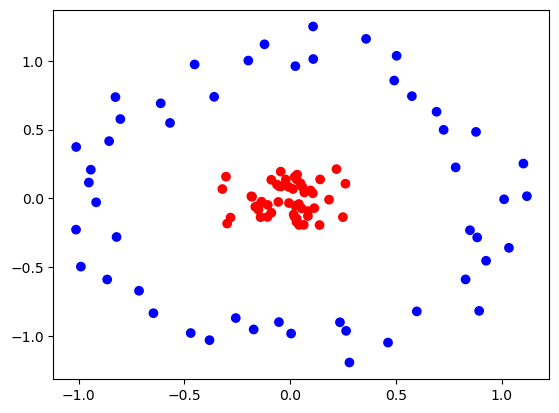

In [6]:
class_colors = ['blue', 'red']
colors = [class_colors[e] for e in y]
plt.scatter(X[:, 0], X[:, 1], color=colors)
plt.show()

Funkcija `plot_3D` prikazuje skup tačaka u prostoru. Očekuje kao argumene koordinate tačaka u ravni (vektori X1 i X2),  njihova obeležja (vektor y), vrednost treće pridružene koordinate (vektor r) i počeni ugao za prikaz određen elevacijom i azimutom. <img src='assets/elevation_azimuth.gif'>

In [7]:
def plot_3D(X1, X2, y, r, elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    
    class_colors = ['blue', 'red']
    colors = [class_colors[e] for e in y]

    ax.scatter3D(X1, X2, r, c=colors, s=50)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('r')
    plt.show()

Naš skup tačaka nakon preslikavanja izgleda ovako: 

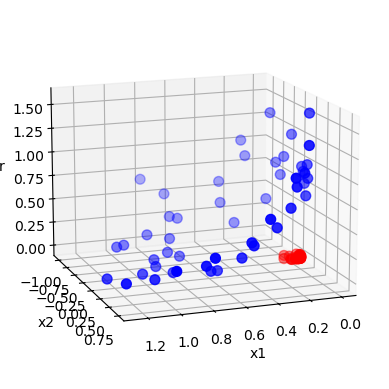

In [8]:
X1 = X[:, 0]
X2 = X[:, 1]

plot_3D(X1**2, np.sqrt(2)*X1*X2, y, X2**2, 14, 70)

Možemo zaključiti da nam je preslikavanje $\Psi$ pomoglo da skup tačaka kružnog oblika koji nije bio linearno separabilan transformišemo u linearno separabilan skup u prostoru veće dimenzije. 

Kernel koji smo posmatrali pripada grupi takozvanih polinomijalnih kernela određenih formulom $k(x, x') = (\alpha x^Tx' + c)^d$. U našem slučaju vrednosti parametara su bili, redom, $\alpha=1$, $c=0$, $d=2$.

Postoje još neki popularni kerneli: 
- linearni: $k(x, x') = x^Tx' + c$
- sigmoidni : $k(x, x') = tanh(\alpha x^Tx' + c)$
- Gausov (RBF): $\Psi(x, x') = e^{-\gamma||x-x'||^2}$

Na primer, korišćenjem RBF kernela ($\gamma=1$), naš skup podataka bi se preslikao na sledeći način:

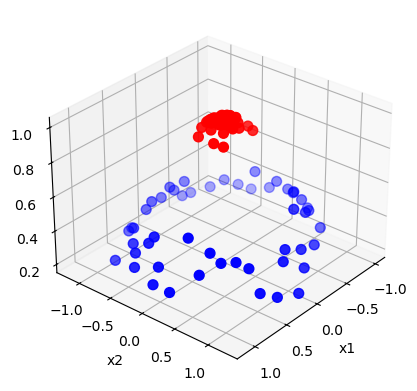

In [9]:
X1 = X[:, 0]
X2 = X[:, 1]

r = np.exp(-(X ** 2).sum(1))
plot_3D(X1, X2, y, r, 30, 40)

jer RBF prati funkcija preslikavanja $\Psi(x) = e^{-\gamma x^2}(1, \sqrt(\frac{2}{1!})x, \sqrt(\frac{2^2}{2!})x^2, \ldots)$. 

U najvećem broju slučajeva u radu sa kernelima eksplicitna forma funkcije $\Psi$ nam nije potrebna, već je dovoljno da znamo da kerneli imaju smisao sličnosti.  